<a href="https://colab.research.google.com/github/naoya5614/Practice/blob/main/python%E3%83%8F%E3%82%9A%E3%83%83%E3%82%B1%E3%83%BC%E3%82%B7%E3%82%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## pythonパッケージ

### numpy
ベクトルや行列の計算を高速に行うライブラリ

In [46]:
import numpy as np

#### 配列の作り方
np.array(リスト)とすることでnumpy.ndarray型のオブジェクトが作成できる<br>
他にもnp.arange, np.zeros, np.onesなどで特殊な配列を作成することも可能

In [47]:
x =np.array([5,3,2])
x

array([5, 3, 2])

In [48]:
type(x)

numpy.ndarray

In [49]:
x.shape

(3,)

In [50]:
A = np.array([[2,4,6],[1,3,5]])
A

array([[2, 4, 6],
       [1, 3, 5]])

In [51]:
A.shape

(2, 3)

In [52]:
y = np.arange(3)
y

array([0, 1, 2])

In [53]:
np.zeros(3), np.ones(5)

(array([0., 0., 0.]), array([1., 1., 1., 1., 1.]))

In [54]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [55]:
# 0から100を10等分．
np.linspace(0,100,10)

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

基本的な統計量の計算はメソッドを用いて計算できる

In [56]:
x.sum(),x.mean(),x.var(),x.std()

(10, 3.3333333333333335, 1.5555555555555554, 1.247219128924647)

### 多次元配列と線型代数
numpyでは多次元配列に対して行列計算を行うことができる

In [57]:
A = np.array([[3,2,4],[3,7,0]])
x = np.array([[10],[20],[30]])
A@x

array([[190],
       [170]])

In [58]:
A = np.array([[3,2,0],[2,6,1],[2,4,8]])
np.linalg.inv(A)

array([[ 0.42307692, -0.15384615,  0.01923077],
       [-0.13461538,  0.23076923, -0.02884615],
       [-0.03846154, -0.07692308,  0.13461538]])

In [59]:
A =np.array([[1,4],[2,3]])
eigen = np.linalg.eig(A)
eigen

(array([-1.,  5.]), array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

#### ブロードキャスト
ベクトルの和や差は2つのベクトルの長さが同じ場合にのみ定義される<br>
同様に行列の演算についても，その演算が定義されるかどうかは行列の型によって決まる<br>
numpyでは通常の方法では演算が定義されない型のベクトルや行列についても，型を適宜修正することによって計算を実行する機能がある<br>
この機能をブロードキャストと言う

In [60]:
np.array([2,3])+np.array([10])

array([12, 13])

In [61]:
#これでも同じ
np.array([2,3])+10

array([12, 13])

In [62]:
np.array([[1,2],[3,4]]) + np.array([10,20])

array([[11, 22],
       [13, 24]])

### scipy
NumPyを基盤にした科学計算ライブラリ<br>
確率，統計，最適化，線型代数，数値積分，フーリエ変換など高度な計算も可能

In [63]:
import scipy as sp
from scipy import stats 

### 正規分布
次のようにして，正規分布の確率密度関数，累積分布関数を扱うことができる

In [64]:
rv = stats.norm()

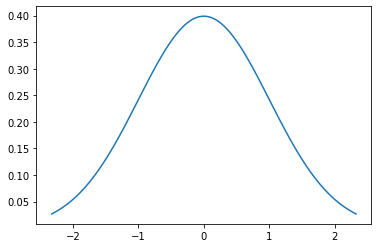

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt 
x =np.linspace(rv.ppf(0.01),
               rv.ppf(0.99), 100)
plt.plot(x, rv.pdf(x))

In [66]:
#定積分
sp.integrate.quad(func=rv.pdf,a=-np.Inf,b=1.96)[0]

0.9750021048517798

### pandas 
データフレームの操作を行うライブラリ<br>
csvファイルの読み込みや前処理などに用いる

In [67]:
import pandas as pd

In [71]:
df = pd.DataFrame({"x":[1,2,4,3],"y":[5,6,7,8],"z":["A","A","B","B"]})
df

,x,y,z
0,1,5,A
1,2,6,A
2,4,7,B
3,3,8,B


In [72]:
#特定の列だけ取り出せる．
df["x"]

0    1
1    2
2    4
3    3
Name: x, dtype: int64

In [73]:
#存在しない列をしていすると追加できる．
df["new"] = [10,20,30,40]
df

,x,y,z,new
0,1,5,A,10
1,2,6,A,20
2,4,7,B,30
3,3,8,B,40


In [74]:
#各列の要約
df.describe()

,x,y,new
count,4.000000,4.000000,4.000000
mean,2.500000,6.500000,25.000000
std,1.290994,1.290994,12.909944
min,1.000000,5.000000,10.000000
25%,1.750000,5.750000,17.500000
50%,2.500000,6.500000,25.000000
75%,3.250000,7.250000,32.500000
max,4.000000,8.000000,40.000000


In [75]:
df.corr()

,x,y,new
x,1.0,0.8,0.8
y,0.8,1.0,1.0
new,0.8,1.0,1.0


In [76]:
# groupbyメソッドで同じ処理をグループごとに行うことができる
g = df.groupby("z")
g.describe()

x                                 ...       new                              
  count mean       std  min   25%  50%  ...       std   min   25%   50%   75%   max
z                                       ...                                        
A   2.0  1.5  0.707107  1.0  1.25  1.5  ...  7.071068  10.0  12.5  15.0  17.5  20.0
B   2.0  3.5  0.707107  3.0  3.25  3.5  ...  7.071068  30.0  32.5  35.0  37.5  40.0

[2 rows x 24 columns]

In [77]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
df = pd.DataFrame(boston.data, columns = boston.feature_names) #こういう作り方もできる．

### matplotlib
NumPyを基盤にしたグラフ描画ライブラリ<br>
データそのものの可視化だけでなく，学習の精度をグラフにまとめることも重要

In [78]:
from matplotlib import pyplot as plt

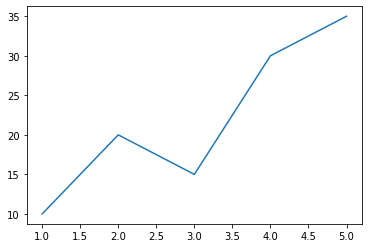

In [79]:
# 折れ線グラフ
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 15, 30, 35])
plt.plot(x,y)

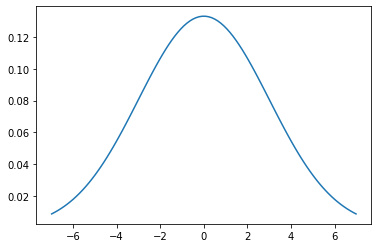

In [80]:
#正規分布のpdf
x =np.linspace(rv.ppf(0.01),
               rv.ppf(0.99), 100)
plt.plot(x, rv.pdf(x))

(array([  4.,  28.,  88., 204., 282., 228., 120.,  34.,   9.,   3.]),
 array([-10.04360208,  -7.87317976,  -5.70275743,  -3.53233511,
         -1.36191278,   0.80850954,   2.97893187,   5.14935419,
          7.31977651,   9.49019884,  11.66062116]),
 <a list of 10 Patch objects>)

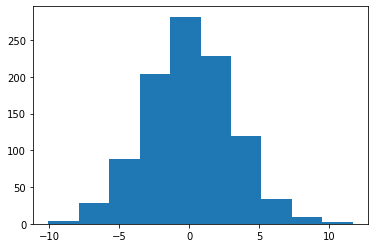

In [81]:
# ヒストグラム
rv = stats.norm(loc= 0, scale=3)
rvs = rv.rvs(size = 1000)
plt.hist(rvs)

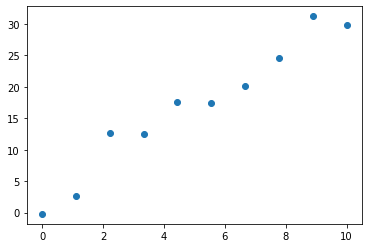

In [82]:
# 散布図
x = np.linspace(0, 10, 10)
y = 3*x + 1 + rv.rvs(size=10)
plt.scatter(x,y)

Text(0, 0.5, 'y')

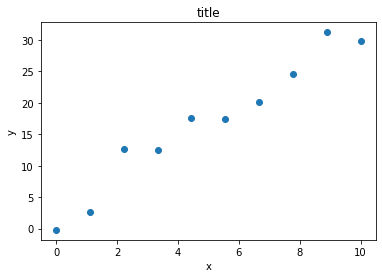

In [83]:
# タイトルやラベルをつけると丁寧
plt.scatter(x,y)
plt.title('title')
plt.xlabel('x') 
plt.ylabel('y')